<a href="https://colab.research.google.com/github/bhavna2608/Facial-Expression-Recognition/blob/main/CGS698C_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 1: Estimating the posterior distribution using different computational method

#### 1.

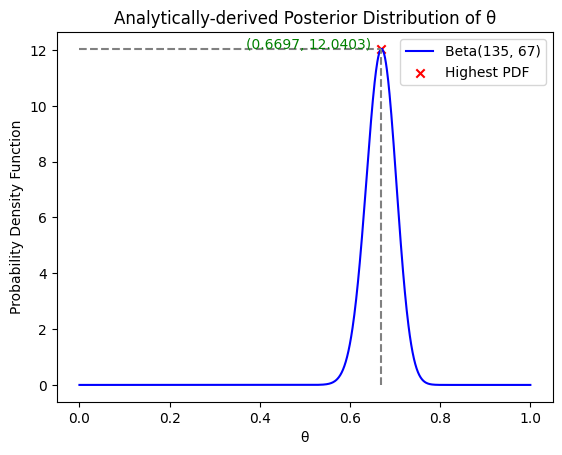

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta distribution
alpha = 135
beta_param = 67

# Generate values for theta
theta_values = np.linspace(0, 1, 1000)

# Calculate the probability density function (PDF) for the Beta distribution
pdf_values = beta.pdf(theta_values, alpha, beta_param)

# Find the coordinates of the highest PDF value
max_index = np.argmax(pdf_values)
max_theta = theta_values[max_index]
max_pdf_value = pdf_values[max_index]

# Plot the estimated posterior density function with modifications
plt.plot(theta_values, pdf_values, label='Beta(135, 67)', color='blue')
plt.scatter(max_theta, max_pdf_value, color='red', marker='x', label='Highest PDF')

# Add dotted lines
plt.plot([max_theta, max_theta], [0, max_pdf_value], linestyle='--', color='gray')
plt.plot([0, max_theta], [max_pdf_value, max_pdf_value], linestyle='--', color='gray')

# Annotate the coordinates
plt.text(max_theta - 0.3, max_pdf_value, f'({max_theta:.4f}, {max_pdf_value:.4f})', color='green')

plt.title('Analytically-derived Posterior Distribution of θ')
plt.xlabel('θ')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

#### 2.

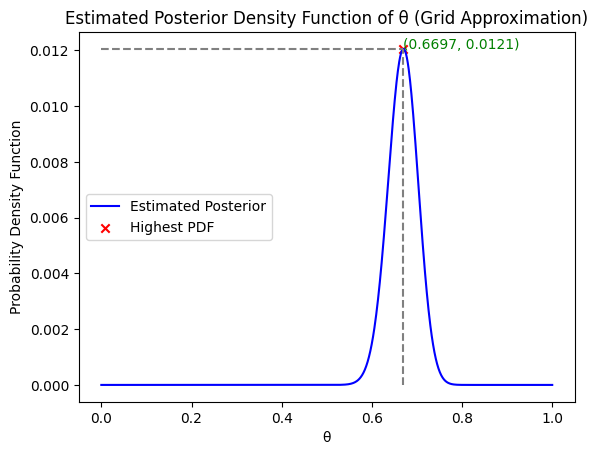

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import beta

# Observed data
data = np.array([10, 15, 15, 14, 14, 14, 13, 11, 12, 16])
n = 20  # Sample size

# Prior parameters
prior_alpha = 1
prior_beta = 1

# Grid approximation
theta_values = np.linspace(0, 1, 1000)
prior = beta.pdf(theta_values, prior_alpha, prior_beta)

# Likelihood function
likelihood = np.prod(binom.pmf(np.tile(data, (len(theta_values), 1)).T, n, theta_values), axis=0)  # Calculate for each data point and then multiply

# Posterior proportional to likelihood times prior
posterior = likelihood * prior
posterior /= np.sum(posterior)  # Normalize to make it a proper probability distribution

# Find the coordinates of the highest PDF value
max_index = np.argmax(posterior)
max_theta = theta_values[max_index]
max_pdf_value = posterior[max_index]

# Plot the estimated posterior density function with modifications
plt.plot(theta_values, posterior, label='Estimated Posterior', color='blue')
plt.scatter(max_theta, max_pdf_value, color='red', marker='x', label='Highest PDF')

# Add dotted lines
plt.plot([max_theta, max_theta], [0, max_pdf_value], linestyle='--', color='gray')
plt.plot([0, max_theta], [max_pdf_value, max_pdf_value], linestyle='--', color='gray')

# Annotate the coordinates
plt.text(max_theta, max_pdf_value, f'({max_theta:.4f}, {max_pdf_value:.4f})', color='green')

plt.title('Estimated Posterior Density Function of θ (Grid Approximation)')
plt.xlabel('θ')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

#### 3.

In [3]:
import numpy as np
from scipy.stats import beta

# Parameters for the Beta distribution
alpha_prior = 1
beta_prior = 1

# Number of Monte Carlo samples
num_samples = 10000

# Draw samples from the prior Beta(1, 1)
prior_samples = beta.rvs(alpha_prior, beta_prior, size=num_samples)
# print(prior_samples)

# Small constant to avoid logarithm of zero
epsilon = 1e-10

# Likelihood function for each sample in log space
def log_likelihood(sample):
    # Assuming the same observed data as before
    data = np.array([10, 15, 15, 14, 14, 14, 13, 11, 12, 16])
    n = 20  # Sample size
    return np.sum(np.log(beta.pdf(data, n, sample) + epsilon))

# Calculate log likelihood for each sample
log_likelihood_values = np.array([log_likelihood(sample) for sample in prior_samples])
# print(log_likelihood_values)

# Estimate the log marginal likelihood by taking the average
log_marginal_likelihood_estimate = np.mean(log_likelihood_values)
# print(log_marginal_likelihood_estimate)

# Convert log likelihood back to the marginal likelihood
marginal_likelihood_estimate = np.exp(log_marginal_likelihood_estimate)

print(f"Marginal Likelihood Estimate: {marginal_likelihood_estimate:.1e}")

Marginal Likelihood Estimate: 1.0e-100


#### 4.

In [4]:
import numpy as np
from scipy.stats import binom, beta, uniform

# Given data
data_points = np.array([10, 15, 15, 14, 14, 14, 13, 11, 12, 16])

# Define the likelihood function for a Binomial distribution
def likelihood(theta, data):
    return np.prod(binom.pmf(data, n=20, p=theta))

# Define the prior function for a Beta distribution
def prior(theta):
    return beta.pdf(theta, 1, 1)

# Define the proposal density function
# You can choose any distribution that covers the support of the parameter θ
def proposal_density(theta):
    return uniform.pdf(theta, 0, 1)

# Number of samples
N = 1000

# Initialize arrays to store samples and weights
theta_samples = np.zeros(N)
weights = np.zeros(N)

# Generate samples from the proposal density
for i in range(N):
    theta_samples[i] = np.random.uniform(0, 1)

    # Compute likelihood, prior, and proposal density for each sample
    likelihood_value = likelihood(theta_samples[i], data_points)
    prior_value = prior(theta_samples[i])
    proposal_value = proposal_density(theta_samples[i])

    # Compute the weight for each sample
    weights[i] = likelihood_value * prior_value / proposal_value

# Normalize weights
weights /= np.sum(weights)

# Select N/4 samples based on weights
selected_indices = np.random.choice(np.arange(N), size=N//4, p=weights, replace=True)
selected_samples = theta_samples[selected_indices]

# Display the selected samples
print("Selected samples from the posterior distribution of θ:")
print(selected_samples)

Selected samples from the posterior distribution of θ:
[0.66820975 0.70906707 0.6221581  0.66637732 0.63938911 0.62737084
 0.70669754 0.64666774 0.69392751 0.68423156 0.64702027 0.67446906
 0.64400379 0.59308775 0.65981053 0.73122307 0.6247246  0.67559633
 0.59924155 0.64054465 0.65570674 0.69392751 0.70942951 0.64612354
 0.71264255 0.65042804 0.65046292 0.65234792 0.66820975 0.64400379
 0.61865848 0.66396157 0.66820975 0.61985288 0.65042804 0.64970142
 0.62527152 0.65570773 0.66820975 0.65311896 0.65042804 0.66180081
 0.62527152 0.72469118 0.64214125 0.65412731 0.66180081 0.64612354
 0.67324641 0.68038243 0.61533931 0.6122022  0.6546993  0.68168375
 0.63104869 0.66314901 0.72840741 0.6479614  0.68423156 0.64942781
 0.65311896 0.61575346 0.61985288 0.64782892 0.64970142 0.71124015
 0.6479614  0.60662475 0.66637732 0.69400269 0.64691696 0.64782892
 0.71554895 0.59924155 0.65068309 0.71122875 0.68687002 0.66613238
 0.67412669 0.64375371 0.71554895 0.66637732 0.71122875 0.6546993
 0.63445

#### 5.

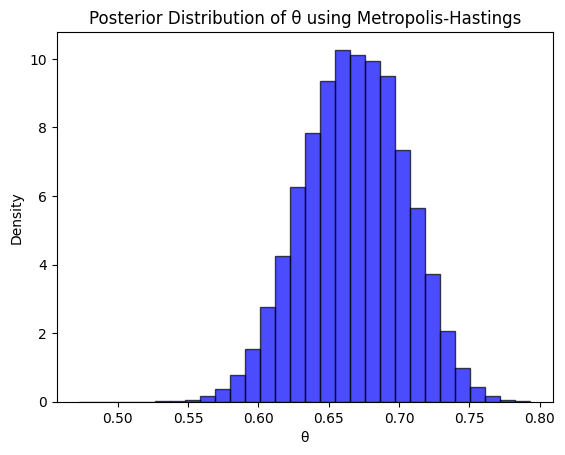

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta, norm, uniform

# Given data
data_points = np.array([10, 15, 15, 14, 14, 14, 13, 11, 12, 16])

# Parameters for the prior distribution
a = 1
b = 1

# Markov chain parameters
nsamp = 50000
theta_chain = np.zeros(nsamp)
theta_chain[0] = np.random.beta(a, b, 1)

# Metropolis-Hastings algorithm
i = 0
reject = 0
step = 0.1  # step-size for proposal distribution

while i < nsamp - 1:
    # Sample from proposal distribution
    proposal_theta = theta_chain[i] + np.random.normal(0, step, 1)
    proposal_theta = np.clip(proposal_theta, 0, 1)  # Ensure theta is within [0, 1]

    # Compute prior * likelihood
    post_new = binom.pmf(data_points, n=20, p=proposal_theta).prod() * beta.pdf(proposal_theta, a, b)
    post_prev = binom.pmf(data_points, n=20, p=theta_chain[i]).prod() * beta.pdf(theta_chain[i], a, b)

    # Compute Hastings ratio
    Hastings_ratio = (post_new * norm.pdf(theta_chain[i], proposal_theta, step)) / \
                     (post_prev * norm.pdf(proposal_theta, theta_chain[i], step))

    p_str = min(Hastings_ratio, 1)  # Probability of acceptance

    if p_str > np.random.uniform(0, 1):
        theta_chain[i + 1] = proposal_theta
        i += 1
    else:
        reject += 1

# Plot the histogram of the posterior samples
plt.hist(theta_chain, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title("Posterior Distribution of θ using Metropolis-Hastings")
plt.xlabel("θ")
plt.ylabel("Density")
plt.show()

#### 6.

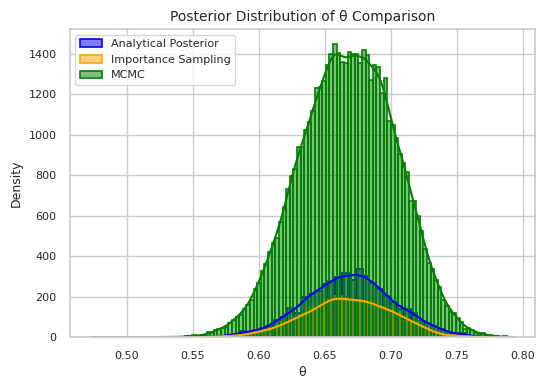

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta

# Given data
data_points = np.array([10, 15, 15, 14, 14, 14, 13, 11, 12, 16])

# Analytical posterior parameters
analytical_posterior_alpha = 135
analytical_posterior_beta = 67

# Importance sampling results
# (Replace this with your actual importance sampling code)
importance_samples = np.random.beta(135, 67, 2500)

mcmc_samples = theta_chain

# Analytical posterior samples
analytical_samples = np.random.beta(analytical_posterior_alpha, analytical_posterior_beta, 5000)


# Set style using Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))

# Analytical Posterior
sns.histplot(analytical_samples, kde=True, label="Analytical Posterior", color='blue', edgecolor='blue', linewidth=1.2)

# Importance Sampling
sns.histplot(importance_samples, kde=True, label="Importance Sampling", color='orange', edgecolor='orange', linewidth=1.2)

# MCMC
sns.histplot(mcmc_samples, kde=True, label="MCMC", color='green', edgecolor='green', linewidth=1.2)

plt.title("Posterior Distribution of θ Comparison", fontsize=10)
plt.xlabel("θ", fontsize=9)
plt.ylabel("Density", fontsize=9)
plt.legend(fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


### Part 2: Writing your own sampler for Bayesian inference

#### 1.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, norm, lognorm

# Load the data (replace 'path/to/word-recognition-times.csv' with the actual path or URL)
data = pd.read_csv('https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Data/word-recognition-times.csv')

# Markov chain parameters
nsamp = 6000
mu_chain = np.zeros(nsamp)
sigma_chain = np.zeros(nsamp)

# Initialization of Markov chain
mu_chain[0] = np.random.normal(10, 6, 1)
sigma_chain[0] = truncnorm.rvs(a=0, b=np.inf, loc=0, scale=2, size=1)

# Evolution of Markov chain
i = 0
reject = 0
step = 0.1  # step-size for proposal distribution

while i < nsamp - 1:
    # Sample from proposal distribution
    proposal_mu = np.random.normal(mu_chain[i], step, 1)
    proposal_sigma = truncnorm.rvs(a=0, b=np.inf, loc=sigma_chain[i], scale=step, size=1)

    # Compute prior * likelihood
    post_new = np.sum(lognorm.logpdf(data['RT'], s=proposal_sigma, scale=np.exp(proposal_mu))) + \
               norm.logpdf(proposal_mu, loc=10, scale=6) + \
               truncnorm.logpdf(proposal_sigma, a=0, b=np.inf, loc=0, scale=2)

    post_prev = np.sum(lognorm.logpdf(data['RT'], s=sigma_chain[i], scale=np.exp(mu_chain[i]))) + \
                norm.logpdf(mu_chain[i], loc=10, scale=6) + \
                truncnorm.logpdf(sigma_chain[i], a=0, b=np.inf, loc=0, scale=2)

    # Compute Hastings ratio
    Hastings_ratio = np.exp((post_new + norm.logpdf(mu_chain[i], loc=proposal_mu, scale=step) +
                            truncnorm.logpdf(proposal_sigma, a=0, b=np.inf, loc=sigma_chain[i], scale=step)) -
                           (post_prev + norm.logpdf(proposal_mu, loc=mu_chain[i], scale=step) +
                            truncnorm.logpdf(proposal_sigma, a=0, b=np.inf, loc=0, scale=2)))

    p_str = min(Hastings_ratio, 1)  # Probability of acceptance

    if p_str > np.random.uniform(0, 1):
        mu_chain[i + 1] = proposal_mu
        sigma_chain[i + 1] = proposal_sigma
        i += 1
    else:
        reject += 1

<ipython-input-22-5db9168b9f03>:38: RuntimeWarning: overflow encountered in exp
  Hastings_ratio = np.exp((post_new + norm.logpdf(mu_chain[i], loc=proposal_mu, scale=step) +


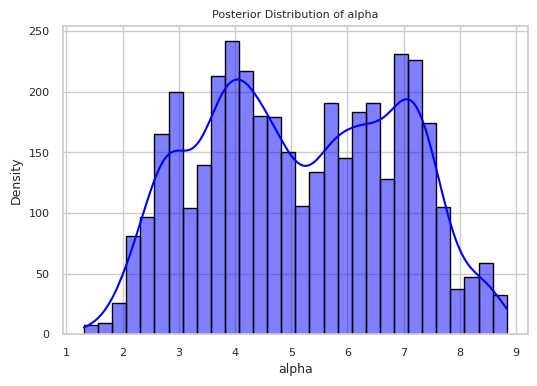

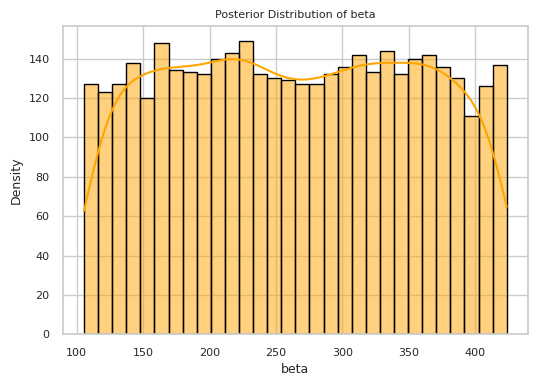

In [21]:
import seaborn as sns

# Set style using Seaborn
sns.set(style="whitegrid")

# Plot the posterior distribution of mu
plt.figure(figsize=(6, 4))
sns.histplot(mu_chain[2000:], bins=30, kde=True, color='blue', edgecolor='black')
plt.title("Posterior Distribution of alpha", fontsize=8)
plt.xlabel("alpha", fontsize=9)
plt.ylabel("Density", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Plot the posterior distribution of sigma
plt.figure(figsize=(6, 4))
sns.histplot(sigma_chain[2000:], bins=30, kde=True, color='orange', edgecolor='black')
plt.title("Posterior Distribution of beta", fontsize=8)
plt.xlabel("beta", fontsize=9)
plt.ylabel("Density", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

#### 2.

In [11]:
# Calculate 95% credible intervals for mu and sigma
credible_interval_mu = np.percentile(mu_chain[2000:], q=[2.5, 97.5])
credible_interval_sigma = np.percentile(sigma_chain[2000:], q=[2.5, 97.5])

print("95% Credible Interval for alpha:", credible_interval_mu)
print("95% Credible Interval for beta:", credible_interval_sigma)

95% Credible Interval for mu: [2.22955489 8.2887103 ]
95% Credible Interval for sigma: [114.5451364  416.50833451]
